Programación Evolutiva
===

* 30:00 min | Última modificación: Mayo 19, 2021 | [YouTube]

## Definición del problema

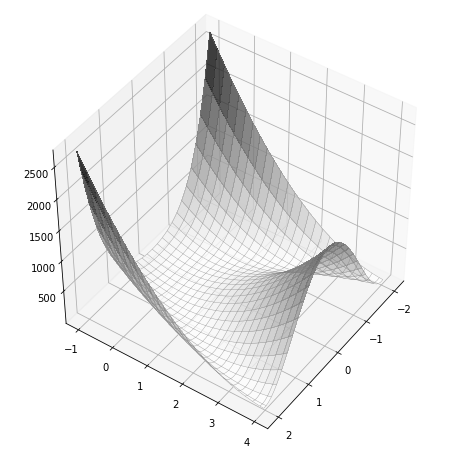

In [1]:
from plots import plot_contour, plot_surface
from testfunctions import rosenbrock as fn

#
# Se desea encontrar el punto de mínima de la función de
# Rosenbrock de dos dimensiones. El punto de mínima es
# f(1, 1) = 0. La región de busqueda es
#
#    -2.048 < x < 2.048
#       -1. < y < 4.
#
plot_surface(
    fn,
    x_bounds=[(-2.048, 2.048), (-1, 4)],
)

## Generación de la población inicial

In [2]:
from generators import RandomUniform

POPSIZE = 20

monte_carlo = RandomUniform(
    pop_size=POPSIZE,
    low=[-2.048, -1.0],
    high=[2.048, 4.0],
    EP_sigma=[0.2, 0.2],
)

population = monte_carlo()
population[:5]

[{'x': array([-1.06737389,  3.84522962]),
  'fn_x': None,
  'EP_sigma': [0.2, 0.2]},
 {'x': array([-1.14416109, -0.55739643]),
  'fn_x': None,
  'EP_sigma': [0.2, 0.2]},
 {'x': array([2.03854712, 1.22895581]), 'fn_x': None, 'EP_sigma': [0.2, 0.2]},
 {'x': array([0.70191755, 2.56056299]), 'fn_x': None, 'EP_sigma': [0.2, 0.2]},
 {'x': array([-0.34104131,  1.47583866]),
  'fn_x': None,
  'EP_sigma': [0.2, 0.2]}]

## Evaluación de la función objetivo

In [3]:
from fnevaluator import FnEvaluator

#
# Define el operador para la evaluación
#
fn_eval = FnEvaluator(fn=fn)
population = fn_eval(population)
population[:5]

[{'x': array([-1.06737389,  3.84522962]),
  'fn_x': 736.4865696522653,
  'EP_sigma': [0.2, 0.2]},
 {'x': array([-1.14416109, -0.55739643]),
  'fn_x': 352.9800330346516,
  'EP_sigma': [0.2, 0.2]},
 {'x': array([2.03854712, 1.22895581]),
  'fn_x': 857.6467159965999,
  'EP_sigma': [0.2, 0.2]},
 {'x': array([0.70191755, 2.56056299]),
  'fn_x': 427.69945062964877,
  'EP_sigma': [0.2, 0.2]},
 {'x': array([-0.34104131,  1.47583866]),
  'fn_x': 186.63043359102954,
  'EP_sigma': [0.2, 0.2]}]

## Selección por torneo

In [4]:
from selection import SelectionTournament

selection = SelectionTournament(k=10, tournsize=5)            
offsprings = selection(population)
offsprings[:5]

[{'x': array([-0.12623853, -0.34743976]),
  'fn_x': 14.472619679904245,
  'EP_sigma': [0.2, 0.2]},
 {'x': array([0.30210712, 0.10941679]),
  'fn_x': 0.5199897426736816,
  'EP_sigma': [0.2, 0.2]},
 {'x': array([-1.17236951,  1.23929056]),
  'fn_x': 6.546003874816698,
  'EP_sigma': [0.2, 0.2]},
 {'x': array([1.77525696, 3.20242326]),
  'fn_x': 0.8599618392301185,
  'EP_sigma': [0.2, 0.2]},
 {'x': array([-2.01521838,  3.93252486]),
  'fn_x': 10.744829583334184,
  'EP_sigma': [0.2, 0.2]}]

## Mutación

In [5]:
from mutation import MutationGaussianEP
    
mutate = MutationGaussianEP()
offsprings = mutate(offsprings)
offsprings[:5]

[{'x': array([-0.0139302 , -0.34211435]),
  'fn_x': 14.472619679904245,
  'EP_sigma': array([0.1169109 , 0.22603206])},
 {'x': array([0.43795885, 0.17418714]),
  'fn_x': 0.5199897426736816,
  'EP_sigma': array([0.16201054, 0.2259986 ])},
 {'x': array([-1.02772363,  1.13233562]),
  'fn_x': 6.546003874816698,
  'EP_sigma': array([0.16246205, 0.25670752])},
 {'x': array([1.67356452, 3.12070049]),
  'fn_x': 0.8599618392301185,
  'EP_sigma': array([0.19814134, 0.20863881])},
 {'x': array([-2.05615079,  3.88211169]),
  'fn_x': 10.744829583334184,
  'EP_sigma': array([0.16763947, 0.23872482])}]

## Algoritmo Básico 

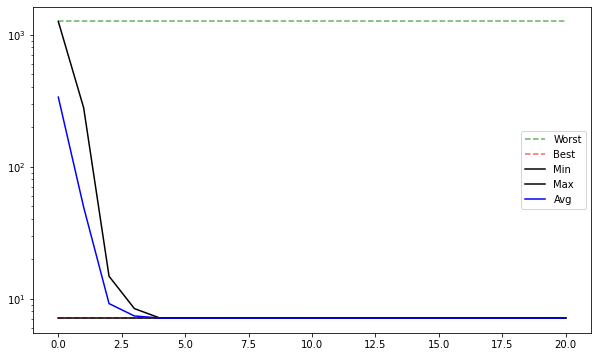

In [6]:
from stats import Statistics

#
# Parámetros
#
NGEN = 20
POPSIZE = 10
NOFFSPRINGS = 6
TOURNSIZE = 5


#
# Operadores genéticos
# =======================================================================
#
generate_population = RandomUniform(
    pop_size=POPSIZE,
    low=[-2.048, -1.0],
    high=[2.048, 4.0],
    EP_sigma=[1.0, 1.0],
)

fn_eval = FnEvaluator(fn=fn)


parent_selection = SelectionTournament(
    k=NOFFSPRINGS,
    tournsize=TOURNSIZE,
)

mutate = mutate = MutationGaussianEP()

new_generation = SelectionTournament(
    k=POPSIZE,
    tournsize=TOURNSIZE,
)

stats = Statistics()

#
# Algoritmo
# =======================================================================
#

population = generate_population()
population = fn_eval(population)
stats(population)


for _ in range(NGEN):

    offsprings = parent_selection(population)
    offsprings = mutate(offsprings)
    population = new_generation(population + offsprings)
    
    stats(population)
    

stats.plot()